<a href="https://colab.research.google.com/github/cinxdy/temp/blob/master/LSTM_share_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

version : 다운 받은 데이터 버전

In [ ]:
version = "intgStrct-01intgStrct-02intgStrct-05intgStrctstrct"
# intgStrct-01intgStrct-02intgStrct-05intgStrctstrct
import pandas as pd
pd.set_option('display.max_rows', 500)

import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/통선대/2020 사업/빅데이터센터/통일빅데이터센터 자료팀 공유/topic.csv')
data.head()

,Unnamed: 0,index,제목,키워드,주제
0,0,0,오늘의 주요뉴스,주요뉴스 1. 1일 집중호우 피해 경기 남부 충북 지역 급류 산사태 5명 실종자 발...,pol
1,1,1,"정경두, 집중호우에도 경계작전에 허점 발생하지 않도록 지시",정경 집중호우 경계작전 허점 발생 지시 정경 국방부 장관 청사 서울 용산 국방부 긴...,pol
2,2,2,"김정은 '반려견 금지령' ""강제로 잡아다 보신탕집 넘긴다""",금지령 김정은 반려견 강제 보신탕집 국무위원장 김정은 북한 국무 위원장 반려견 금지...,pol
3,3,3,"안민석, 세종 집 내놓은 윤희숙에 “칭찬할 일”",안민석 세종 윤희숙 칭찬 의원 더불어민주당 안민석 의원 윤희숙 미래 통합 칭찬 의원...,pol
4,4,5,‘자리다툼’ 대전 지방의원 무더기 징계,자리다툼 대전 지방 의원 무더기 징계 대전시의회 모습 자리다툼 의회 파행 운영 야기...,pol


In [ ]:
data.shape

(105906, 5)

In [ ]:
data.groupby('주제').count()

,Unnamed: 0,index,제목,키워드
주제,,,,
cul,16611,16611,16611,16611
eco,15584,15584,15584,15584
int,13543,13543,13543,13543
it,11857,11857,11857,11857
pol,15894,15894,15894,15894
soc,14248,14248,14248,14248
spo,18169,18169,18169,18169


In [ ]:
data.columns.to_list()
data = data.drop_duplicates()
## 업로드한 데이터에서 불필요한 column들을 지운다.
for i in data.columns.to_list():
  if bool(i != "제목") ^ bool(i != "키워드") ^ bool(i != "주제"):
    print(i)
    data = data.drop([i], axis = 1)

data.groupby('주제').count()


Unnamed: 0
index


,제목,키워드
주제,,
cul,16611,16611
eco,15584,15584
int,13543,13543
it,11857,11857
pol,15894,15894
soc,14248,14248
spo,18169,18169


max length article :  11437
ave article length :  531.3261666005703


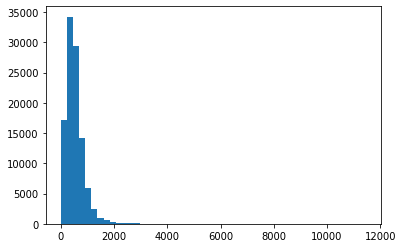

In [ ]:
# 데이터 정보 확인... 크기 혹은 주제...
## graph 그려서 보기
data = data.sort_values(by=["주제"])
topicList = list(set(data["주제"].to_list()))
# topicList = list(set(data.sort_values(by=["주제"])["주제"].to_list()))

data = data.astype(str)


keys = data["키워드"]
keys = keys.astype(str)

lst = keys.to_list()

print("max length article : ", max([len(i) for i in lst]))
print("ave article length : " , sum(map(len,lst))/len(lst) )

plt.hist([len(i) for i in lst], bins = 50)
plt.show()

In [ ]:
import matplotlib.font_manager as fm
# plt.rcParams['font.family'] = 'NanumGothic'

font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

y = []

for topic in topicList:
  sumVal = (data["주제"]==topic).sum()
  y.append(sumVal)
  print(topic ,"count : ", sumVal)

plt.xlabel("",fontproperties=fontprop)
plt.plot(topicList, y,)
plt.show()



In [ ]:
## 개별 주제 확인해보기
data[data["주제"]=="cul"].head(5)
## 데이터 셔플
from sklearn.utils import shuffle
data = shuffle(data)
unclass = data['주제'].isin(['미분류'])
data=data[~unclass]
data.head(10)
# nan 확인

# data.isnull()
data.isnull().sum()
data.head(20)
# data = data.iloc[:100000,:]

# 주제 지우기 함수
def removeTopic(top):
  data = data.drop(data[data["주제"] == top].index)

  y = []
  topicList = list(set(data.sort_values(by=["주제"])["주제"].to_list()))

  import matplotlib.font_manager as fm
  # plt.rcParams['font.family'] = 'NanumGothic'


  font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
  fontprop = fm.FontProperties(fname=font_path, size=18)


  for topic in topicList:
    sumVal = (data["주제"]==topic).sum()
    y.append(sumVal)
    print(topic ,"count : ", sumVal)

  plt.xlabel("",fontproperties=fontprop)
  plt.plot(topicList, y,)
  plt.show()

  y = []

  import matplotlib.font_manager as fm
  # plt.rcParams['font.family'] = 'NanumGothic'


  font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
  fontprop = fm.FontProperties(fname=font_path, size=18)


  for topic in topicList:
    sumVal = (data["주제"]==topic).sum()
    y.append(sumVal)
    print(topic ,"count : ", sumVal)

  plt.xlabel("",fontproperties=fontprop)
  plt.plot(topicList, y,)
  plt.show()

# removeTopic("it")
## IT지우기
# data = data.drop(data[data["주제"].map(lambda i : i == "cul")].index)
# topicList = list(set(data.sort_values(by=["주제"])["주제"].to_list()))
# data = data.astype(str)

# keys = data["키워드"]
# keys = keys.astype(str)

# lst = keys.to_list()

# print("max length article : ", max([len(i) for i in lst]))
# print("ave article length : " , sum(map(len,lst))/len(lst) )

# plt.hist([len(i) for i in lst], bins = 50)
# plt.show()

# y = []

# import matplotlib.font_manager as fm
# # plt.rcParams['font.family'] = 'NanumGothic'


# font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
# fontprop = fm.FontProperties(fname=font_path, size=18)


# for topic in topicList:
#   sumVal = (data["주제"]==topic).sum()
#   y.append(sumVal)
#   print(topic ,"count : ", sumVal)

# plt.xlabel("",fontproperties=fontprop)
# plt.plot(topicList, y,)
# plt.show()


In [ ]:
data.head()

,Unnamed: 0,index,제목,키워드,주제,id
0,0,0,오늘의 주요뉴스,주요뉴스 1. 1일 집중호우 피해 경기 남부 충북 지역 급류 산사태 5명 실종자 발...,pol,0
1,1,1,"정경두, 집중호우에도 경계작전에 허점 발생하지 않도록 지시",정경 집중호우 경계작전 허점 발생 지시 정경 국방부 장관 청사 서울 용산 국방부 긴...,pol,1
2,2,2,"김정은 '반려견 금지령' ""강제로 잡아다 보신탕집 넘긴다""",금지령 김정은 반려견 강제 보신탕집 국무위원장 김정은 북한 국무 위원장 반려견 금지...,pol,2
3,3,3,"안민석, 세종 집 내놓은 윤희숙에 “칭찬할 일”",안민석 세종 윤희숙 칭찬 의원 더불어민주당 안민석 의원 윤희숙 미래 통합 칭찬 의원...,pol,3
4,4,5,‘자리다툼’ 대전 지방의원 무더기 징계,자리다툼 대전 지방 의원 무더기 징계 대전시의회 모습 자리다툼 의회 파행 운영 야기...,pol,4


In [ ]:
for i in range(len(data)):
  data.at[i,"id"]=str(i)
id=data["id"]

In [ ]:
data.tail()

,Unnamed: 0,index,제목,키워드,주제,id
105901,105901,19991,세종 하천수질 지난해보다 크게 개선,세종 하천 수질 개선 BOD 수질 자료 전년 호전 세종시 하천 관내 수질측정망 운영...,soc,105901
105902,105902,19992,"제천교육지원청, 28일 저녁 8시 '글로벌 학부모 온라인 토크'",제천교육지원청 28일 토크 글로벌 학부모 온라인 제천교육지원청 교육장 안태영 학부모...,soc,105902
105903,105903,19993,"예산교육청, 더봄학생 '돋보기' 지원",예산교육청 돋보기 지원 예산 교육 지원청 특수 교육 지원 센터 장애 학생 인권 보호...,soc,105903
105904,105904,19994,"예산, '심(心)심(審)꾸러미' 제공으로 '코로나블루' 극복!",예산 꾸러미 제공 코로나블루 극복 예산군보건소 코로나19 장기 프로그램 중단 어려움...,soc,105904
105905,105905,19996,"충주시, 대학입시 대비 진로진학컨설팅 교육경비 지원",충주시 지원 대학 입시 대비 진로 진학 컨설팅 교육 경비 1:1 오프라인 맞춤 대학...,soc,105905


# Keras

## 데이터 전처리

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
test = str(data["키워드"])

In [ ]:
MAX_NB_WORDS = 5000
MAX_SEQUENCE_LENGTH = 500


In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters = ",")
# 빈도가 높은 최대 5000개의 단어들로만 인덱싱

In [ ]:
data["키워드"] = data["키워드"].astype(str)

In [ ]:
tokenizer.fit_on_texts(data["키워드"].values)
#padas와 호완이 된다. string array을 넣는다.
# string array을 넣으면 각 string element에서 계산을 다 해서
# 단어들을 indexing한다.
# word_index : 전체 문서 셋에서 단어에 idx 매핑 전체 문서 셋에서 단어 빈도수 따라서 
# 빈도 수 높을 수록 낮은 숫자에 매핑. 단어 -> 숫자 매핑
# index_word : word_index의 반대 표현. object에서 숫자 -> 단어 매핑.
# 일단 indexing은...
"""
from : https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do
fit_on_texts Updates internal vocabulary based on a list of texts. This method creates the vocabulary index based on word frequency. So if you give it something like, "The cat sat on the mat." It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"] = 2 it is word -> index dictionary so every word gets a unique integer value. 0 is reserved for padding. So lower integer means more frequent word (often the first few are stop words because they appear a lot).
texts_to_sequences Transforms each text in texts to a sequence of integers. So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary. Nothing more, nothing less, certainly no magic involved.
"""




'\nfrom : https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do\nfit_on_texts Updates internal vocabulary based on a list of texts. This method creates the vocabulary index based on word frequency. So if you give it something like, "The cat sat on the mat." It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"] = 2 it is word -> index dictionary so every word gets a unique integer value. 0 is reserved for padding. So lower integer means more frequent word (often the first few are stop words because they appear a lot).\ntexts_to_sequences Transforms each text in texts to a sequence of integers. So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary. Nothing more, nothing less, certainly no magic involved.\n'

In [ ]:
word_index = tokenizer.word_index
print(f"found %s unique tokens." %len(word_index))

found 400196 unique tokens.


In [ ]:
# tokenizer.word_index

In [ ]:
# tokenizer.word_counts

In [ ]:
# 위에서 각 단어 -> 정수 매핑했다. 가장 빈도수 높은 키워드가 1번 
# 이제 문서를 정수 표현으로 바꾼다.
X = tokenizer.texts_to_sequences(data["키워드"].values)


In [ ]:
from keras.preprocessing.sequence import pad_sequences
print(len(X[0]))
print(X[0])

49
[1489, 3373, 144, 6, 989, 1413, 14, 2540, 1704, 41, 144, 117, 169, 2947, 103, 1058, 2541, 2355, 4967, 178, 2347, 11, 1654, 1740, 1, 116, 2710, 41, 1592, 33, 473, 225, 582, 284, 90, 4497, 4, 220, 23, 906, 2494, 57, 949, 198, 4366, 4, 137, 416, 1263]


In [ ]:
X = pad_sequences(X, maxlen = MAX_SEQUENCE_LENGTH)
print("shape of data tensor: ", X.shape)

shape of data tensor:  (105906, 500)


In [ ]:
X

array([[   0,    0,    0, ...,  137,  416, 1263],
       [   0,    0,    0, ...,  113,  168,   77],
       [   0,    0,    0, ..., 1588,  311,  543],
       ...,
       [   0,    0,    0, ...,  510,  935,  742],
       [   0,    0,    0, ...,  385, 1816,  742],
       [   0,    0,    0, ...,  894, 1236,   19]], dtype=int32)

TEST SET


### 이제 카테고리 값을 설정하자.
* 각각의 카테고리에 원 핫 인코딩을 한다.
* 특정한... 기준에 따라 각각의 list의 값에 원핫인코딩을 시킨다.
* get_dummies함수를 사용.
* 실제 모델에 들어갈 Y는 값이 필요하므로 values값 적용.
* 어느 주제가 몇번째 1으로 인코딩되었는지 확인하려면 head으로 표현
* 이 순서를 사용해서 실제 카테고리를 표현한다.

In [ ]:
# Y = pd.get_dummies(data["주제"]).values
topicDummy = pd.get_dummies(data["주제"])
Y = topicDummy.values
topicDummy.tail()

,cul,eco,int,it,pol,soc,spo
105901,0,0,0,0,0,1,0
105902,0,0,0,0,0,1,0
105903,0,0,0,0,0,1,0
105904,0,0,0,0,0,1,0
105905,0,0,0,0,0,1,0


In [ ]:

topicDummy.columns

Index(['cul', 'eco', 'int', 'it', 'pol', 'soc', 'spo'], dtype='object')

In [ ]:
print("shape of label tensor:", Y.shape)

shape of label tensor: (105906, 7)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test ,id_train, id_test= train_test_split(X,Y,id,test_size = 0.1, random_state = 42)

In [ ]:
print(X_train.shape, Y_train.shape)

(95315, 500) (95315, 7)


In [ ]:
print(X_test.shape, Y_test.shape)

(10591, 500) (10591, 7)


In [ ]:
# !pip install --upgrade tensorflow
import keras; print(keras.__version__)

2.4.3


원래는 아래와 같았는데, 에러가 발생했음.stackoverflow에 검색해보니 케라스가 업그레이드 되면서 해당 버전에서는 아래와 같은 지원을 하지 않게 되었다고 카더라.


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, Embedding, SpatialDropout1D, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping


---------------------------------------------------------------------------
ImportError                               Traceback (most recent call last)
<ipython-input-30-0b5b2e682d0b> in <module>()
      1 import tensorflow as tf
      2 from tensorflow.keras.models import Sequential
----> 3 from tensorflow.keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, Embedding, SpatialDropout1D, Bidirectional
      4 from tensorflow.keras.callbacks import EarlyStopping
      5 

ImportError: cannot import name 'CuDNNLSTM'

---------------------------------------------------------------------------
NOTE: If your import is failing due to a missing package, you can
manually install dependencies using either !pip or !apt.

To view examples of installing some common dependencies, click the
"Open Examples" button below.
---------------------------------------------------------------------------

TEST SET

In [ ]:
reverse_word_map=dict(map(reversed, tokenizer.word_index.items()))

def sequence_to_text(list_of_indices):
  words=[reverse_word_map.get(letter)for letter in list_of_indices]
  return words
test_set=list(map(sequence_to_text, X_test))
train_set=list(map(sequence_to_text, X_train))
test_set=pd.DataFrame(test_set)
train_set=pd.DataFrame(train_set)

In [ ]:
print(test_set)
print(Y_test)

        0     1     2     3     4    ...      495    496    497  498   499
0      None  None  None  None  None  ...     홈페이지    이메일     포함   미션    수행
1      None  None  None  None  None  ...       증가     남성     향상   효과    도움
2      None  None  None  None  None  ...       교회    23일     내달   폐쇄    조치
3      None  None  None  None  None  ...       운영    체계적     인재   육성    지원
4      None  None  None  None  None  ...  코로나바이러스  코로나19     검사   반응  주한미군
...     ...   ...   ...   ...   ...  ...      ...    ...    ...  ...   ...
10586  None  None  None  None  None  ...       협회     사건  대한체육회   조처   입장문
10587  None  None  None  None  None  ...       대상     시험     정부   승인    계획
10588  None  None  None  None  None  ...       수립     산학     연관   노력    교수
10589  None  None  None  None  None  ...       보호     취지    집주인  세입자    피해
10590  None  None  None  None  None  ...       소개     제공     정보   정책    자금

[10591 rows x 500 columns]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ..

In [ ]:
import numpy as np
topicList = topicDummy.columns
topic_train=[0 for i in range(len(X_train))]
labels = topicList
for i in range(len(train_set)):
  topic_train[i]= labels[np.argmax(Y_train[i])]
print(topic_train[0:10])
topic_train=pd.DataFrame(topic_train)
print(topic_train)
train_set["주제"]=topic_train

['int', 'int', 'spo', 'int', 'cul', 'soc', 'int', 'int', 'it', 'int']
         0
0      int
1      int
2      spo
3      int
4      cul
...    ...
95310  int
95311  spo
95312  soc
95313  pol
95314  pol

[95315 rows x 1 columns]


In [ ]:
train_set["주제"]=topic_train

#id_test=pd.DateFrame(id_test)
#print(id_test)

In [ ]:
import numpy as np
topicList = topicDummy.columns
topic=[0 for i in range(len(Y_test))]
labels = topicList
for i in range(len(test_set)):
  topic[i]= labels[np.argmax(Y_test[i])]
print(topic[0:10])
topic=pd.DataFrame(topic)
print(topic)

['it', 'spo', 'cul', 'eco', 'pol', 'it', 'pol', 'int', 'pol', 'soc']
         0
0       it
1      spo
2      cul
3      eco
4      pol
...    ...
10586  spo
10587  int
10588   it
10589  eco
10590   it

[10591 rows x 1 columns]


In [ ]:
test_set["주제"]=topic

#id_test=pd.DateFrame(id_test)
#print(id_test)

## 학습

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, Embedding, SpatialDropout1D, Bidirectional
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, SpatialDropout1D, Bidirectional

from tensorflow.keras.callbacks import EarlyStopping



### 기본적인 모델
* 그런데 epoch =1, 과 2일 때 차이가 0.3이 난다. 에폭을 더 늘려서 시도해볼 필요성이 있어보인다.
* 에폭 = 2 -> 8.3
* 에폭 = 5- > 

In [ ]:
X_train

array([[   0,    0,    0, ..., 2025,   83,   33],
       [   0,    0,    0, ...,   10,  927,   21],
       [   0,    0,    0, ...,  175,   97, 3462],
       ...,
       [   0,    0,    0, ...,  940,  556,  601],
       [   0,    0,    0, ...,   10,  896,  361],
       [   0,    0,    0, ..., 3898, 1426,   77]], dtype=int32)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 512)               2099200   
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 1799      
Total params: 4,792,327
Trainable params: 4,792,327
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1341/1341 [==============================] - 208s 155ms/step - loss: 0.5700 - accuracy: 0.8229 - precision: 0.8720 - recall: 0.7757 - false_positives: 9767.0000 - false_negatives: 19241.0000 - val_loss: 0.3556 - val_accuracy: 0.8880 

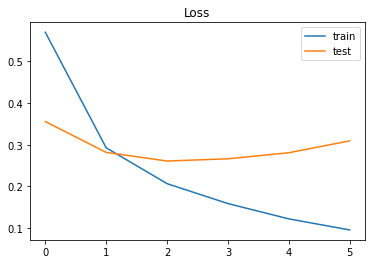

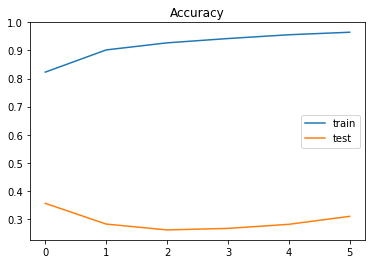

In [ ]:


model = Sequential()
EMBEDDING_DIM = 512
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))

model.add(LSTM(EMBEDDING_DIM)) 
#model.add(Dropout(0.2))
model.add(Dense(EMBEDDING_DIM/2, activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(len(topicList), activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy',
                          tf.keras.metrics.Precision(name='precision')\
                          ,tf.keras.metrics.Recall(name='recall')\
                          ,tf.keras.metrics.FalsePositives(name='false_positives')\
                          ,tf.keras.metrics.FalseNegatives(name='false_negatives')])


epochs = 10
batch_size = 64
history = model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

#accuracy show
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

#accuracy graph
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

plt.title('Accuracy')

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
model.save('/content/drive/My Drive/test/LSTM_Topic.h5')

In [ ]:
pred=model.predict(Y_test)

In [ ]:
prediction=[0 for i in range(len(Y_test))]
for i in range(len(test_set)):
  prediction[i]= labels[np.argmax(pred[i])]
print(prediction[0:10])
prediction=pd.DataFrame(prediction)
print(prediction)


['int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int']
         0
0      int
1      int
2      int
3      int
4      int
...    ...
10586  int
10587  int
10588  int
10589  int
10590  int

[10591 rows x 1 columns]


In [ ]:
test_id=[0 for i in range(len(id_test))]
test_id=id_test.tolist()
print(test_id[:10])
test_id=pd.DataFrame(test_id)
test_id.head()
test_id=test_id.apply(pd.to_numeric)
test_set["id"]=test_id
test_set["예측"]=prediction

['69820', '74102', '37236', '22193', '6766', '73243', '14197', '60516', '14290', '103069']


In [ ]:

test_set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,주제,id,예측
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,오픈,기념,이벤트,다음달,진행,조건,만족,참여자,추첨,화학,대중,증정,예정,이벤트,참여,사람,홈페이지,sns,공유,계정,sns,유튜브,블로그,페이스북,구독,게시판,홈페이지,응원,기기,응원,sns,공유,홈페이지,이메일,포함,미션,수행,it,69820,int
1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,관중,경기,원정,중단,축구,응원,경기력,도움,선수들,코로나19,사태,무관,경기,평가,팬들,응원,효과,자신감,상승,신체,변화,영국,프로,축구,선수,대상,홈경기,신체,반응,조사,수치,결과,증가,남성,향상,효과,도움,spo,74102,int
2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,목사,사랑제일교회,광화문,집회,영향,코로나19,확산세,만큼,교회,코로나,전파,조롱,하나님,일반,코로나19,감염,하나님,코로나,믿음,사람들,코로나,거짓말,외부,위험,상식,이웃,피해,조심,상식,교회,비난,대상,교회,23일,내달,폐쇄,조치,cul,37236,int
3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,강화,삼성전자,글로벌,경쟁력,파트너십,구축,지속,가능,구축,경영,환경,삼성전자,원활,자금,운용,도움,대금,지급,지원,펀드,조성,구매,대금,조기,지급,교육,전담,상생,협력,아카데미,교육,센터,운영,체계적,인재,육성,지원,eco,22193,int
4,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,주한,미군,가족,확진,코로나19,모습,서울,주한,미군,기지,주한,미군,이달,24일,한국,도착,7명,주한,미군,5명,가족,감염증,신종,코로나바이러스,코로나19,검사,반응,주한미군,pol,6766,int
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10586,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,감독,감독,닥터,분위기,닥터,목소리,정도,상태,경주시청,닥터,경주시청,일요일,자격,권한,권한,닥터,책임,거짓말,책임,녹취록,최숙현,선수,공포,고통,체육회,인권,센터,접수,4월,조치,아무것,철인,협회,사건,대한체육회,조처,입장문,spo,81785,int
10587,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,과학,데이터,공개,만큼,안전,논란,제기,가능성,얘기,연구소,임상,시험,결과,정리,동료,검토,발행,러시아,절차,백신,임상,시험,백신,가능성,제기,러시아,백신,임상,진행,연구소,3일,의료진,대상,시험,정부,승인,계획,int,50132,int
10588,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,화학,산업,확보,노력,지속적,정부,뉴딜,핵심,그린,화이트,생명,공학,경쟁력,확보,융합,선택,필수,의료진,헌신,정부,정책,국민,동참,세계,모범,우리나라,본격적,시대,우리나라,세계,선도,전략,수립,산학,연관,노력,교수,it,67393,int
10589,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,제한,세입자,이득,장기적,부담,지적,임대,전세,매물,급감,연장,계약,종료,전세,월세,전환,집주인,주택,매수,대출,규제,상황,부동산,학과,교수,임대차,전세,매물,현상,전셋값,가능성,세입자,보호,취지,집주인,세입자,피해,eco,19523,int


In [ ]:
len(test_set)

10591

In [ ]:
diff=[]
small_diff=[]
not_pol=0
all_not_pol=0
for i in range(len(test_set)):
  if test_set.loc[i, "주제"]==test_set.loc[i,"예측"]:
      not_pol+=1
print(not_pol)#모든 데이터를 정치로 분류한다. 


1326


In [ ]:
#주제별 data 갯수찾기
c=0
diff=[]
O=0
X=0
P=0
all_not_pol=0
for i in range(len(test_set)):
  if test_set.loc[i, "주제"]=='spo':
    c+=1
    if test_set.loc[i, "주제"]==test_set.loc[i,"예측"]:
        O+=1
    else:
      diff.append(test_set.loc[i])
      X+=1
      if test_set.loc[i, "예측"]=='int':
        P+=1
print(O)#모든 데이터를 정치로 분류한다. 
print(X)

print(P)



0
1791
1791


In [ ]:
print(diff)

In [ ]:
#주제별 data 갯수찾기
c=0
diff=[]
O=0
X=0
P=0
all_not_pol=0
for i in range(len(train_set)):
  if train_set.loc[i, "주제"]=='spo':
    c+=1
 
print(c)#모든 데이터를 정치로 분류한다. 


16378


In [ ]:
len(train_set)

95315

In [ ]:
train_set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,주제
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,납부,편법,위법,사항,설명,차이,여당,대응,정도,원내대표,김태년,민주당,원내,대표,편법,증여,방식,아들,그룹,질타,이스타항공,민주당,목소리,조사,대상,국세청,의뢰,정도,조사,진행,계열사,의원,자녀,납부,관계자,당국,개월,정도,조사,pol
1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,신규,비디오,게임,글로벌,출시,시작,게임,라인업,순차적,확대,예정,매치,게임,전략,분야,신규,게임,출시,사업,게임,확대,방침,공모,예정,2만,2만,공모,주식,공모,기준,규모,31일,확정,공모,청약,코스닥,시장,상장,예정,it
2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,세대,구성원,좌절,해결,방안,대표적,독자,고민,생각,분들,조직,결국,사람,실행,세상,비전,사람,달성,전략,결국,사람,실행,의미,산업,혁명,진행,사람,조직,중요,자원,경쟁력,조직,고민,사람,이슈,사람,이야기,교수,연세대,cul
3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,인사,홍남기,경제,부총리,장관,홍남기,경제,부총리,기획,재정부,서울,중구,세제,발전,심의,위원회,인사,pol
4,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,중요,하나님,말씀,사람들,나라,사람,세상,이스라엘,조금,하나님,세상,하나님,세상,하나님,심판,사람들,마음,하나님,하나님,말씀,신앙,하나님,예배,이스라엘,하나님,결과,세상,기도,이스라엘,특별,하나님,하나님,말씀,범위,하나님,중심,이름,기도,목사,int
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95310,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,지사,이날,충남,설립,디지털,성폭력,피해,통합,지원,체계,내년,연말,예정,규모,의사,간호사,배치,수준,요금,운영,예정,센터,서비스,디지털,성폭력,피해,종합,지원,총괄,지원,기관,피해,지원,연계,신고,접수,추적,관리,계획,pol
95311,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,낚시,모습,낚시,이날,전용,시작,낚시,만큼,낚시,낚시,그림,이날,주인공,각오,시작,사상,제주,낚시,대결,시작,얘기,불안,시작,호소,궁금증,증폭,만큼,불안,가중,제작진,50만,200만,시작,방송,호기심,방송,연예,한경닷컴,이슈팀,cul
95312,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,불만,접수,품목,사태,입국,제한,취소,마스크,불만,소비자,불만,상반기,1천,접수,마스크,외식,소비자,불만,증가,1천,기록,대구시,경제,국장,여행,외식,서비스,예약,취소,발생,항목,연말,특별,공제,포함,지역,국회의원,적극,협의,eco
95313,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,건조,선박,높이,규모,승객,최대,노트,가능,인도,2023년,활용,예정,환경,규제,강화,선박,시작,유럽,기업,패키지,시장,선점,상황,파악,사업,스마트,전기,핵심,실증,분야,경쟁력,확보,지원,개척,어려움,기업들,시장,창출,방침,eco


In [ ]:
test = ["""
 남북물류포럼 칼럼 제350호사드배치 알 박기, 진정 국익을 위한 것일까?추 원 서남북물류포럼 수석부회장지난달 말 롯데가 국방부와 성주골프장을 고고도미사일방어체계(THAAD·사드) 부지로 제공하는 계약을 체결한 이후, 한·중 간 갈등이 표면화되면서 중국의 보복이 노골화하고 있다. 거듭되는 중국의 반대와 경고에도 불구하고 한미 당국이 사드의 조기 배치 의지를 재천명하며 절차를 신속히 진행하는 움직임을 보이자, 중국은 이미 시행되던 경고성 조치를 넘어 롯데에 대한 '보복'을 시작으로 전방위 경제 및 문화 보복에 나서고 있다. 경제적 측면에서 당장 예상되는 커다란 손실은 물론, 앞으로 정치․외교․사회․군사 등 여러 방면에서도 심대한 피해와 후유증이 우려되고 있다. 만일, 사태가 장기화한다면 지난 25년 간 어렵게 축적해온 중국인의 한국에 대한 신뢰와 우호적 정서마저 크게 손상될 것이라는 것은 불문가지다. 물론, 상호의존도가 높은 글로벌 경제 하에서 중국이 입을 손실 역시 작지는 않을 것이다. 우리는 중국의 보복조치를 유감스럽게 생각하면서도, 중국이 사드배치를 왜 그토록 강하게 반대하는 상황에서 한국 정부가 알박기 하듯, 서둘러 사드 배치를 강행하는 것이 과연 국가의 장래에 도움이 될 것인지를 생각해 볼 필요가 있다. 결론부터 말한다면 현 정부는 사드 배치의 성급한 추진을 잠정 중단하고 차기 정부에 넘기는 것이 합당하고 현명하다는 것이다. 그 이유는 다음과 같다.첫째, 사드배치는 북한 핵 위협에 대처하는 방위적 조치라는 말로 설명할 수 있는 단순한 문제가 아니기 때문이다. 사드배치는 동북아 안보지형과 세력균형을 근본적으로 흔드는 사건이다. 중국이 반대하는 이유는 바로 여기에 있다. 미국은 부상하는 중국을 견제하기 위해 일본의 군사대국화를 용인하면서, 한국을 묶는 전략을 구사하고 있다. 중국은 사드가 미국의 대중국 포위전략의 일환이며, 액스밴드 레이더를 통해 자신을 근접거리에서 감시함으로써 유사 시 중국의 대응능력을 크게 훼손할 것을 우려하고 있다. 또한 이를 계기로 한국이 미국과 일본이 추진하는 미사일방어망(MD)에 편입되어 자신을 향해 칼날을 겨누게 될 것을 우려한다. 이에 대해 한국 정부는 사드배치는 어디까지나 북한의 핵·미사일 위협에 대비하기 위한 방위용이며 미국이 추진하는 MD 참여와는 관련이 없다는 것을 누차 강조해왔다. 실제로 한국은 김대중 정부 이래 지역 MD 체계 편입에 반대한다는 입장을 유지해 온 것이 사실이다. 3분 내외면 북한 미사일이 한국에 도달할 수 있기 때문에 MD의 효용성이 낮을 뿐 아니라, 자칫하면 미․중 간 군사적 대립에 말려들 소지가 있다고 보았기 때문이다. 그러나 최근 미국의 의도가 한국을 미사일 방어망에 편입시키려는 것에 있음이 밝혀짐으로써 한국 정부의 주장이 무색하게 되고 말았다. 지난 2월 23일 트럼프 대통령은 “한국과 일본에 미사일 방어체계(MD)를 강화하겠다”며 한국을 특정하여 MD 편입을 시사한 것이 그것이다. 따라서 중국에 있어 사드배치는 미·중 간 군사적 완충지대 역할을 자임해오던 한국이 미국 및 일본의 미사일 공동망의 참여를 통해 중국에 대항하겠다는 것이나 마찬가지가 되었다. 해양세력과 대륙세력의 파워게임에 한국이 해양세력의 편을 들어 중국에 맞서는 형국이 되는 것이다. 둘째, 성급한 사드 배치 추진은 자칫하면 군사적 자주권의 상실과 한반도의 발칸화로 이어질 가능성이 높다는 점이다. 만일, 중국의 양해 없이 사드배치가 이루어졌다고 가정해 보자. 우리 사회 일각에서 주장하는 것처럼 당장은 중국의 압력에 맞서 군사적 주권을 지켰다고 큰소리칠 수는 있다. 그러나 이후의 상황은 어떻게 전개될까? 한국은 앞으로 북한 외에 중국과 러시아의 위협에 대처하기 위해 군사력을 더욱 증대할 수밖에 없다. 또한 어쩔 수 없이 미국에게 안보를 더욱 의존하지 않으면 안 되는 상황에 내몰리게 될 것이다. 미국은 당연히 한국의 부담 하에 사드의 추가배치를 요구할 것이며, 동중국해와 남중국해에서 중국의 군사력을 견제할 목적으로 제주나 진해항에 줌왈트호 등 미해군력의 배치 허용을 요구할 것이다. 이때 한국은 중국의 위협을 의식, 미국의 요구를 들어주지 않을 수 없게 된다. 한반도 평화와 안정을 위한 한·미동맹이 동아시아에서 미국의 군사적 이익을 추종하는 공격적 동맹으로 변질됨으로써 ‘한반도의 발칸화’라는 최악의 안보불안을 자초하게 될 것이다.셋째, 사드의 군사적 효용성을 포함한 배치의 적합성에 대한 신중한 검토가 필요하기 때문이다. 지난해 사드 배치 결정 과정은 국내에서 충분한 논의와 검토 없이 이루어졌다. 주무부처인 국방부마저 앞뒤가 맞지 않는 논리로 사드배치의 타당성만 강조했다. 의사결정 메커니즘의 허술함을 짐작하게 하고도 남는다. 정부는 물론, 국회 내에서라도 충분한 논의와 공론 과정을 거쳤더라면 사드배치의 부적합에 따른 대안을 모색했을 것이다. 설사 불가피하게 필요하다는 판단에 이르렀더라도 국민들을 충분히 설득하고 이웃인 중국의 우려를 덜어주는 방안을 강구함은 물론, 설득할 수 있는 시간적 여유를 확보할 수 있었을 것이다. 넷째, 북핵문제 해결과 한반도 평화통일이라는 대의를 위해서라도 반드시 중국의 협력을 얻는 외교적 노력이 절실하기 때문이다. 북핵문제 해결의 주요 당사자인 중국을 적대시한다면 앞으로 과연 중국이 북핵문제 해결에 적극적으로 나설 수 있을까? 북한 핵은 기정사실화 되고 다시는 북한 핵문제를 해결할 수 있는 기회를 갖지 못하게 될 것이다. 뿐만 아니라 향후 남북의 통일과정에서 중국은 한국의 통일을 지지하고 협력하는데 주저하게 될 것이다. 마지막 이유는 차기 정부가 나서서 남북관계 복원을 포함한 큰 그림 속에서 사드배치와 핵문제 등 현안을 해결할 수 있도록 해주는 것이 정치적 도의라고 믿기 때문이다. 국내외적으로 사면초가에 처해있는 현 정부가 굳이 엄청난 희생을 무릅쓰고서라도 사드의 신속한 배치를 결행해야 할 만큼 절실하고 시급한 상황에 처해 있는 지 자문해볼 필요가 있다. 만일 그게 아니라면 지금이라도 미국에 양해를 구하여 사드 배치 추진 문제를 차기 정부에 넘기는 것이 올바른 선택일 것이다. 갓 취임한 트럼프 대통령 역시 그것이 선거로 선출되는 민주주의 정부에서 오히려 당연한 도리라는 점을 누구보다도 잘 이해하고 있을 것이다.(끝) 김정남  |   2017-03-08        지난 10년간 천문학적인 국방비를 지출하면서도 왜 핵개발을 추진하지 않아서 이런 형국까지 당하는지 이해를 하기가 힘들다.돈이 없는가? 기술이 없는가? 모두 있으면서도 유독 핵우산에 의존한 당연한 귀결이니 답답할 뿐이다. 함무라비법전에도 있듯이 핵에는 핵으로 균형을 맞추어야 한다. 최소의 비용으로 최대의 공포를 줄 수 있는 핵개발을 북한이 포기할 까닭이 없다.지금이라도 늦지 않았으니 당당하게 자위차원에서 핵개발을 선언하여야 한다. 그래야 중국에게도 공격의 빌미를 주지 않고 핵의 균형을 갖춰서 정은이 망나니가 우쭐대지 못하고 대화의 광장으로 나올 가능성이 조금이라도 높아진다. 남의 힘을 빌려 내집을 지키다보면 결국 살림살이 모두 내어주며 바보가 되고 그 피해는 고스란이 한민족전체에게 돌아간다.미국도 힘쎈자는 대우한다. 일본을 대하는 그들의 태도가 이를 여실히 보여주지 않는가! 곽태환  |   2017-03-06        추원서 박사가 사드의 실전배치를 다음 정권에 넘기자는 5가지 이유를 잘 정리해줘서 감사하고 공감한다. 한미정부가 사드배치결정의 단순한 안보논리는 북한의 핵. 미사일 위협에 대응하여 사드배치 한다는 논리이다. 이러한 안보논리의 기본적인 전제조건이 오류가 있다. 북한이 핵전쟁을 한다는 가정이다. 만약 북한이 핵탄두 미사일 발사 결정은 무엇을 의미하는가? 북한이 핵 전쟁을 각오하고 핵미사일을 남쪽을 향하여 발사해야 한다는 것은 핵전쟁을 하겠다는 것인데 이것은 자살행위이고 과연 핵전쟁을 할 의도가 있다고 가정이 오류가 아닌가? 북한은 핵억지력을 강화하는 이유는 핵전쟁을 방지하기 위해 자위권차원에서 핵무기를 보유한다고 하는데 만약 핵 억지력이 깨지면 핵전쟁이 발생하는데 이것은 공멸을 의미하는데 사드가 불필요하게 될 것이다. 사드가 어떻게 핵 전쟁을 예방 할 수 있는지 한미군부에게 묻고 싶다.
"""]

In [ ]:
def clsfy(test):
  seq = tokenizer.texts_to_sequences(test)
  padded = pad_sequences(seq, maxlen = MAX_SEQUENCE_LENGTH)
  pred = model.predict(padded)
  print(pred, labels[np.argmax(pred)])


In [ ]:
clsfy(test)

[[5.8942869e-06 3.8099424e-05 1.6273771e-04 1.5397208e-06 9.9978715e-01
  2.3371981e-06 2.2480001e-06]] pol


#  TIB real data test

In [ ]:
from tensorflow import keras

new_model = keras.models.load_model('drive/My Drive/Colab Notebooks/Machine Learning/RNN/my_model1201.h5')



OSError: ignored

In [ ]:
kubic = pd.read_json("drive/My Drive/Colab Notebooks/Machine Learning/RNN/refined620.json",encoding="utf-8")
print(kubic[kubic["idList"]=="5de110404b79a29a5f987fe8"])
# kubic.head(5)
for i in range(kubic.shape[0]):
  kubic.loc[i,"tokenized_doc"] = " ".join(kubic["tokenized_doc"][i])
kubic.head(2)

In [ ]:
kubic["주제"] = None


In [ ]:
import numpy as np

In [ ]:
topicList = topicDummy.columns
# print(topicList2)
# print(topicList)

In [ ]:
for i, cont in enumerate(kubic["tokenized_doc"]):
  test = []
  test.append(cont)
  seq = tokenizer.texts_to_sequences(test)
  padded = pad_sequences(seq, maxlen = MAX_SEQUENCE_LENGTH)
  pred = model.predict(padded)
  #pol innt soc cul eco spo
  labels = topicList
  # labels = ['pol', 'eco', 'cul', 'innt', 'spo', 'soc']
  kubic.loc[i,"주제"] = labels[np.argmax(pred)]
  # print(kubic["post_title"][i] , " : ", labels[np.argmax(pred)])
  # print(pred, labels[np.argmax(pred)])

In [ ]:
for top in topicList:
  print(kubic[kubic["주제"]==top][["tokenized_doc","주제"]].head(3),"\n")

In [ ]:
kubicList = list(set(kubic.sort_values(by=["주제"])["주제"].to_list()))
kubic = kubic.astype(str)

keys = kubic["tokenized_doc"][0]
# keys = keys.astype(str)

# lst = keys.to_list()
lst = keys
print("max length article : ", max([len(i) for i in lst]))
print("ave article length : " , sum(map(len,lst))/len(lst) )

plt.hist([len(i) for i in lst], bins = 50)
plt.show()

y = []

import matplotlib.font_manager as fm
# plt.rcParams['font.family'] = 'NanumGothic'


font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)


for topic in topicList:
  sumVal = (kubic["주제"]==topic).sum()
  y.append(sumVal)
  print(topic ,"count : ", sumVal)

plt.xlabel("",fontproperties=fontprop)
plt.plot(topicList, y,)
plt.show()


In [ ]:
kubic[kubic["주제"]=="pol"].head()

# 분석 결과를 저장

## 기존에 다루던 형식
```
"""    {
        "topic" : {
                    "topic_num": 0,
                    "words" : ["단어1", "단어2", ...]
                  }, 
        "doc" : [
                    {
                        "doc": 17, 
                        "title": "문서1 제목"
                        "words" : ["문서1 단어1", "문서1 단어2"]
                        "contents" : "문서1의 텍스트 내용 주저리 주저리"
                    },
                    {
                        "doc": 9, 
                        "title": "문서9 제목"
                        "words" : ["문서9 단어1", "문서9 단어2"]
                        "contents" : "문서9의 텍스트 내용 주저리 주저리"
                    },
                    ...
                ]
    },"""
```

In [ ]:
kubic.head(4)

In [ ]:
kubic = kubic.rename(columns = {'tokenized_doc':'words'})
# kubic.head(4)
kubic.columns

In [ ]:
kubic[kubic["주제"]=="pol"].head(2)


In [ ]:
#-*- coding:utf-8 -*-
ctgResult = []
for topic in topicList:
  # print(topic)
  ctg = kubic[kubic["주제" ]== topic]
  # doc = ctg.to_json(orient = "records",force_ascii=False)
  doc = ctg.to_dict('records')
  print(type(doc))
  catObj = {
      "topic" : topic,
      "doc" : doc
  }
  # print(catObj)
  ctgResult.append(catObj)

# zip(pol["idList"], pol["titles"], pol["tokenized_doc"], pol["contents"])

In [ ]:
ctgResult.shape

In [ ]:
# kubic.head(10)
# catResult = kubic.to_json(force_ascii=False)
import json
with open("drive/My Drive/Colab Notebooks/Machine Learning/RNN/ctgResult.json", 'w', -1,encoding='utf8') as f:
    json.dump(ctgResult,f,ensure_ascii=False)

# 코랩에서 한글 유니코드 대응하기...
json.dumps(ensure_ascii=False) 변화가 없다...


In [ ]:
# print(catResult)
#df.to_json(force_ascii=false)해주면 된다!
#이전에 바꾸면서 안해줘서 깨졌다...